In [1]:
from ekpy import analysis
from ekpy.analysis import plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlrd
#from xlutils.copy import copy

plt.style.use(plotting.lane_martin)

In [2]:
def _average_counts(data_dict,):
   # if len(data_dict['V'].shape) != 1:
    #    raise ValueError('_average_angles only works for 1d, ungrouped data.')
        
    df = pd.DataFrame(data_dict)
    grouping = df.groupby('count')
    out = {}
    for group in grouping:
        count, tdf = group
        means = {col:np.array([np.mean(tdf[col])]) for col in tdf}
        try:
            for key in means:
                out[key] = np.concatenate((out[key], means[key]))
        except KeyError:
            out.update(means)
            
    return out

In [3]:
def _normalize_voltages(data_dict,):
    df = pd.DataFrame(data_dict)

    #First find the range, then find the '0' voltage.
    V_range = 1.0#np.ptp(df['V'])
    V_zero = np.mean(df['Vy'])

    return {'H':np.array(df['H']), 'Vy':np.array((df['Vy']-V_zero)/V_range)}
    

In [4]:
#Next, set fit ranges
def get_fitting_range(frequency,fields,vmix_peak_index):
    B0_Sign = 1
    peak_plus_index = 0
    peak_minus_index = 0
    if True:
        if frequency >= 6: 
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......
            peak_plus_index = np.argmin([np.abs(field - B0_Sign*(125 + np.abs(fields[vmix_peak_index]))) for field in fields])
            peak_minus_index = np.argmin([np.abs(field - B0_Sign*(-125 + np.abs(fields[vmix_peak_index]))) for field in fields])
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......   
        if frequency >= 5 and frequency < 6: 
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......
            peak_plus_index = np.argmin([np.abs(field - B0_Sign*(65 + np.abs(fields[vmix_peak_index]))) for field in fields])
            peak_minus_index = np.argmin([np.abs(field - B0_Sign*(-65 + np.abs(fields[vmix_peak_index]))) for field in fields])
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......   
        if frequency >= 4 and frequency < 5: 
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......
            peak_plus_index = np.argmin([np.abs(field - B0_Sign*(70 + np.abs(fields[vmix_peak_index]))) for field in fields])
            peak_minus_index = np.argmin([np.abs(field - B0_Sign*(-70 + np.abs(fields[vmix_peak_index]))) for field in fields])
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......   
        if frequency >= 3.5 and frequency < 4: 
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......
            peak_plus_index = np.argmin([np.abs(field - B0_Sign*(65 + np.abs(fields[vmix_peak_index]))) for field in fields])
            peak_minus_index = np.argmin([np.abs(field - B0_Sign*(-65 + np.abs(fields[vmix_peak_index]))) for field in fields])
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......   
        if frequency >= 3 and frequency < 3.5: 
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......
            peak_plus_index = np.argmin([np.abs(field - B0_Sign*(60 + np.abs(fields[vmix_peak_index]))) for field in fields])
            peak_minus_index = np.argmin([np.abs(field - B0_Sign*(-60 + np.abs(fields[vmix_peak_index]))) for field in fields])
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......   
        if frequency >= 2.5 and frequency < 3: 
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......
            peak_plus_index = np.argmin([np.abs(field - B0_Sign*(55 + np.abs(fields[vmix_peak_index]))) for field in fields])
            peak_minus_index = np.argmin([np.abs(field - B0_Sign*(-55 + np.abs(fields[vmix_peak_index]))) for field in fields])
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......   
        if frequency >= 2 and frequency < 2.5: 
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......
            peak_plus_index = np.argmin([np.abs(field - B0_Sign*(40 + np.abs(fields[vmix_peak_index]))) for field in fields])
            peak_minus_index = np.argmin([np.abs(field - B0_Sign*(-40 + np.abs(fields[vmix_peak_index]))) for field in fields])
#......ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo............ooooooOOOOOOoooooo......   
    
    return max(peak_plus_index, peak_minus_index), min(peak_plus_index,peak_minus_index)

In [5]:
#print(len(data['frequency_GHz']))
#print(data['frequency_GHz'])

def _select_fitting_data(data_dict,**kwargs):
    print(kwargs)
    freq = list(kwargs['frequency_GHz'])[0]
    #print(freq)
    df = pd.DataFrame(data_dict)
    #print(df['H'])
    #print(df['V'])
    peak_plus_index, peak_minus_index = get_fitting_range(freq,df['H'],np.argmax(df['Vy']))
    #print(peak_plus_index, peak_minus_index)
    return {'H':np.array(df['H'][peak_minus_index:peak_plus_index]), 'Vy':np.array(df['Vy'][peak_minus_index:peak_plus_index])}
    

In [121]:
def stfmr_fit(x,S,A,W,H0,Offset):
    return S*(W**2/(W**2+(x-H0)**2))+A*((x-H0)*W/(W**2+(x-H0)**2)) + Offset

def _perform_fits(data_dict,**kwargs):
    print("here1")
    df = pd.DataFrame(data_dict)
   
    p0 = [np.ptp(df['Vy']),-1*np.ptp(df['Vy'])/4.0, #S,A
          np.ptp(df['H'])/3.0,np.mean(df['H']), #W, H0
          np.min(df['H'])]#df['H'][0]], #Offset
    popt, pcov = curve_fit(stfmr_fit,df['H'],df['Vy'],
                           p0 = p0,
                           maxfev = 4000)
    print("here2")
    perr = np.sqrt(np.diag(pcov))
    T = np.linspace(np.min(df['H']),np.max(df['H']),1000)
    FuncT = stfmr_fit(T,popt[0],popt[1],popt[2],popt[3],popt[4])
    print("here3")
    if popt[2] < 0: 
        popt[1]*=-1
        popt[2]*=-1
    return {'H':T,'V':FuncT, 
            'S':popt[0], 'A':popt[1], 'W':popt[2], 'H0':popt[3], 'Offset':popt[4],
            'dS':perr[0], 'dA':perr[1], 'dW':perr[2], 'dH0':perr[3], 'dOffset':perr[4],
           'Annotation_location':(np.mean(df['H']),np.max(df['Vy']))}

In [122]:
device = 'dev12'
sample = '012623a'
materials = 'BPBO-LSMO'
directory = '.\\%s\\%s\\%s\\test' %(materials, sample, device)
dset = analysis.load_Dataset(directory)
dset

,frequency_GHz,power,reverse,count,sleep_between_measurements,trial,filename
0,4.0,11,True,10,0.3,0,4.0GHz_power11_0.csv
1,4.0,11,False,10,0.3,0,4.0GHz_power11_1.csv
2,4.0,13,True,10,0.3,0,4.0GHz_power13_0.csv
3,4.0,13,False,10,0.3,0,4.0GHz_power13_1.csv
4,4.0,15,True,10,0.3,0,4.0GHz_power15_0.csv
5,4.0,15,False,10,0.3,0,4.0GHz_power15_1.csv
6,4.0,17,True,10,0.3,0,4.0GHz_power17_0.csv
7,4.0,17,False,10,0.3,0,4.0GHz_power17_1.csv


<AxesSubplot:>

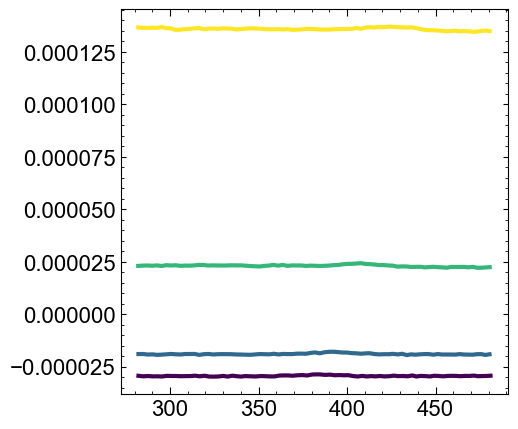

In [125]:
fig, ax = plt.subplots(figsize = (5,5))
data = dset.query('frequency_GHz >1 and reverse == False').get_data().apply(_average_counts)
#data = dset.query('frequency_GHz == 5.').get_data().apply(_average_counts)

#data = data.apply( _normalize_voltages)
data.plot(x='H', y='Vy',ax=ax)

{'frequency_GHz': {4.0}, 'power': {11}, 'reverse': {False}, 'count': {10}, 'sleep_between_measurements': {0.3}, 'trial': {0}}
{'frequency_GHz': {4.0}, 'power': {13}, 'reverse': {False}, 'count': {10}, 'sleep_between_measurements': {0.3}, 'trial': {0}}
{'frequency_GHz': {4.0}, 'power': {15}, 'reverse': {False}, 'count': {10}, 'sleep_between_measurements': {0.3}, 'trial': {0}}
{'frequency_GHz': {4.0}, 'power': {17}, 'reverse': {False}, 'count': {10}, 'sleep_between_measurements': {0.3}, 'trial': {0}}
here1
here2
here3
here1
here2
here3
here1
here2
here3
here1
here2
here3


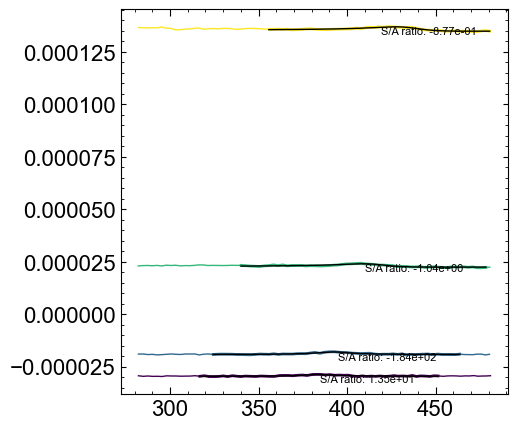

In [126]:
fig, ax = plt.subplots(figsize = (5,5))

fitting_data = data.apply(_select_fitting_data, pass_defn=True)
#print(data)
fitting_data.plot(x='H', y='Vy', ax=ax,linewidth = 2)
data.plot(x='H',y='Vy',ax=ax,linewidth = 1)
fits = fitting_data.apply(_perform_fits, pass_defn=True)
fits.plot(x='H',y='V',ax=ax, color = 'k', linewidth = 1)
for i in range(len(fits['V'])):
    #ax.annotate('S: %.2e $\pm$ %.1e \n A: %.2e $\pm$ %.1e'%(fits['S'][i],fits['dS'][i],fits['A'][i],fits['dA'][i]),
    #ax.annotate('S/A: %.2e \n dA/A: %.2e'%(fits['S'][i]/fits['A'][i],fits['dA'][i]/fits['A'][i]),                        
    #            fits['Annotation_location'][i],verticalalignment='top',fontsize = 8)
    ax.annotate('S/A ratio: %.2e '%(fits['S'][i]/fits['A'][i]),                        
                fits['Annotation_location'][i],verticalalignment='top',fontsize = 8)

In [27]:
##write data to purgatory

In [108]:
workbook = xlrd.open_workbook('purgatory.xls')
worksheet = workbook.sheet_by_name('Sheet1')
numrows = worksheet.nrows

#write in the next row. Load the excel file
rb = xlrd.open_workbook('purgatory.xls')
wb = copy(rb)
w_sheet = wb.get_sheet(0)

for ii in range(len(fits['V'])):
    Filename = '%sGHz_power%s_%s.csv' %(list(data['frequency_GHz'][ii])[0],
                                        list(data['power'][ii])[0],
                                        list(data['trial'][ii])[0])
    w_sheet.write(numrows+ii,0,"%s"%(directory + '\\' + Filename))
    w_sheet.write(numrows+ii,1,"%s"%(device))
    w_sheet.write(numrows+ii,2,"%s" %(list(fits['frequency_GHz'][ii]))[0])
    w_sheet.write(numrows+ii,3,"%s" %(list(fits['power'][ii]))[0])
    w_sheet.write(numrows+ii,4,"%s" %(list(fits['trial'][ii]))[0])
    w_sheet.write(numrows+ii,5,"%s" %(list(fits['count'][ii]))[0])
    w_sheet.write(numrows+ii,6,"%s" %(list(fits['sleep_between_measurements'][ii]))[0])
    w_sheet.write(numrows+ii,7,"%s"%(fits['S'][ii]))
    w_sheet.write(numrows+ii,8,"%s"%(fits['dS'][ii]))
    w_sheet.write(numrows+ii,9,"%s"%(fits['A'][ii]))
    w_sheet.write(numrows+ii,10,"%s"%(fits['dA'][ii]))
    w_sheet.write(numrows+ii,11,"%s"%(fits['W'][ii]))
    w_sheet.write(numrows+ii,12,"%s"%(fits['dW'][ii]))
    w_sheet.write(numrows+ii,13,"%s"%(fits['H0'][ii]))
    w_sheet.write(numrows+ii,14,"%s"%(fits['dH0'][ii]))
    w_sheet.write(numrows+ii,15,"%s"%(fits['Offset'][ii]))
    w_sheet.write(numrows+ii,16,"%s"%(fits['dOffset'][ii]))
    
    
    wb.save('purgatory.xls')
    print("\nExcel written! for %s" %(Filename))
    


Excel written! for 2.6GHz_power8_0.csv

Excel written! for 3.0GHz_power8_0.csv

Excel written! for 3.4GHz_power8_0.csv

Excel written! for 3.8GHz_power8_0.csv

Excel written! for 4.2GHz_power8_0.csv

Excel written! for 2.6GHz_power10_0.csv

Excel written! for 3.0GHz_power10_0.csv

Excel written! for 3.4GHz_power10_0.csv

Excel written! for 3.8GHz_power10_0.csv


In [162]:
data.iloc[0].definition

{'frequency_GHz': {2.6},
 'power': {8},
 'reverse': {True},
 'count': {20},
 'sleep_between_measurements': {0.1},
 'trial': {0}}

In [74]:
#Third step: run fits to the STFMR fit equation


def stfmr_fit(x,S,A,W,H0,Offset):
    return S*(W**2/(W**2+(x-H0)**2))+A*((x-H0)*W/(W**2+(x-H0)**2)) + Offset
#symmetric (S) + antisymetric (A) lorentzian with center H0, width W, with Offset
popts = []
pcovs = []
for i in range(len(data['H'])):
    popt, pcov = curve_fit(stfmr_fit,data['H'][i],data['V'][i],
                           p0 = [1e-5,1e-5,20,200,0],
                           maxfev = 4000)
    popts.append(popt)
    pcovs.append(pcov)

<AxesSubplot:>

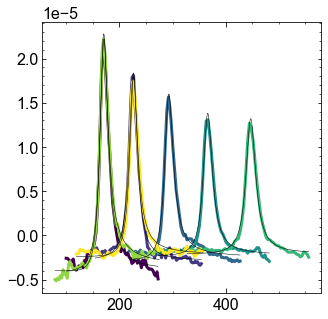

In [75]:
fig1, ax1 = plt.subplots(figsize = (5,5))
T = []
for i in range(len(data['H'])):
    T.append(np.linspace(data['H'][i][0],
                         data['H'][i][len(data['H'][i])-1],
                         1000))
    ax1.plot(T[i],stfmr_fit(T[i],popts[i][0],popts[i][1],popts[i][2],popts[i][3],popts[i][4]),
             color = "black",linewidth = 0.5, zorder = 4)
data.plot(x='H',y='V',ax=ax1, zorder = 3)
             
    